# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

clientes = pd.read_csv("demo01.csv")
clientes.head()


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [5]:
clientes.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [6]:
clientes.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [7]:
clientes["mau"].sum()

390

In [8]:
clientes["mau"].shape

(16650,)

<Axes: xlabel='mau', ylabel='count'>

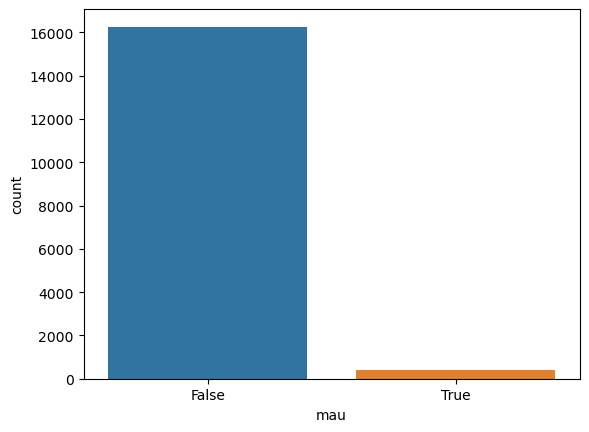

In [9]:
sns.countplot(x="mau", data=clientes)

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.


In [10]:
clientes.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [11]:
novo_data = pd.DataFrame(clientes.dtypes, columns = ["tipo"])
novo_data

,tipo
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [12]:
lista = []

for i in novo_data.index:
    quantidade_var = len(clientes[i].unique())
    lista.append(quantidade_var)
lista

[2, 2, 2, 8, 5, 5, 5, 6, 5298, 3005, 1, 2, 2, 2, 9, 2]

In [13]:
novo_data["qtd_categorias"] = lista
novo_data

,tipo,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [14]:
novo_sexo = pd.get_dummies(clientes["sexo"])
novo_posse_de_veiculo = pd.get_dummies(clientes["posse_de_veiculo"])
novo_posse_de_imovel = pd.get_dummies(clientes["posse_de_imovel"])
novo_tipo_renda = pd.get_dummies(clientes["tipo_renda"])
novo_educacao = pd.get_dummies(clientes["educacao"])
novo_estado_civil = pd.get_dummies(clientes["estado_civil"])
novo_tipo_residencia = pd.get_dummies(clientes["tipo_residencia"])

In [66]:
novo_tipo_residencia

,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
16645,False,True,False,False,False,False
16646,False,True,False,False,False,False
16647,False,True,False,False,False,False
16648,False,True,False,False,False,False


In [39]:
novo_df = pd.DataFrame()

In [67]:
novo_df["sexo M"] = novo_sexo["M"]
novo_df["sexo F"] = novo_sexo["F"]

novo_df["posse de veiculo N"] = novo_posse_de_veiculo["N"]
novo_df["posse de veiculo Y"] = novo_posse_de_veiculo["Y"]

novo_df["posse de  imovel Y"] = novo_posse_de_imovel["Y"]
novo_df["posse de imovel N"] = novo_posse_de_imovel["N"]

novo_df["renda Commercial associate"] = novo_tipo_renda["Commercial associate"]
novo_df["renda Pensioner"] = novo_tipo_renda["Pensioner"]
novo_df["renda State servant"] = novo_tipo_renda["State servant"]
novo_df["renda Student"] = novo_tipo_renda["Student"]
novo_df["renda Working"] = novo_tipo_renda["Working"]

novo_df["Educação Academic degree"] = novo_educacao["Academic degree"]
novo_df["Educação  Higher education"] = novo_educacao["Higher education"]
novo_df["Educação  Incomplete higher"] = novo_educacao["Incomplete higher"]
novo_df["Educação  secondary"] = novo_educacao["Lower secondary"]
novo_df["Educação  Secondary / secondary special"] = novo_educacao["Secondary / secondary special"]

novo_df["Estado civil Civil marriage"] = novo_estado_civil["Civil marriage"]
novo_df["Estado civil Married"] = novo_estado_civil["Married"]
novo_df["Estado civil Separated"] = novo_estado_civil["Separated"]
novo_df["Estado civil Single / not married"] = novo_estado_civil["Single / not married"]
novo_df["Estado civil Widow"] = novo_estado_civil["Widow"]

novo_df["Tipo de residencia Co-op apartment"] = novo_tipo_residencia["Co-op apartment"]
novo_df["Tipo de residencia House / apartment"] = novo_tipo_residencia["House / apartment"]
novo_df["Tipo de residencia Municipal apartment"] = novo_tipo_residencia["Municipal apartment"]
novo_df["Tipo de residencia Office apartment"] = novo_tipo_residencia["Office apartment"]
novo_df["Tipo de residencia Rented apartment"] = novo_tipo_residencia["Rented apartment"]
novo_df["Tipo de residencia With parents"] = novo_tipo_residencia["With parents"]

In [68]:
novo_df

,sexo M,sexo F,posse de veiculo N,posse de veiculo Y,posse de imovel Y,posse de imovel N,renda Commercial associate,renda Pensioner,renda State servant,renda Student,...,Estado civil Married,Estado civil Separated,Estado civil Single / not married,Estado civil Widow,Tipo de residencia Co-op apartment,Tipo de residencia House / apartment,Tipo de residencia Municipal apartment,Tipo de residencia Office apartment,Tipo de residencia Rented apartment,Tipo de residencia With parents
0,True,False,False,True,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,False,True,True,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,False,True,True,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,True,False,False,True,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,False,True,False,True,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
16646,False,True,True,False,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
16647,True,False,False,True,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
16648,True,False,False,True,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [19]:
tab_cruzada = pd.crosstab(clientes["posse_de_veiculo"], clientes["possui_email"])
tab_cruzada

possui_email,0,1
posse_de_veiculo,,
N,9341,837
Y,5829,643


In [20]:
clientes["possui_email"].sum()

1480

In [23]:
print("Fazendo uma analise, ao meu ver, o que me parece mais poderosa para prever a probabilidade de mau pagador são as pessoas que não apresentam posse de veículo e que não possuem email. Então devemos ficar mais alertas nesse caso.")

Fazendo uma analise, ao meu ver, o que me parece mais poderosa para prever a probabilidade de mau pagador são as pessoas que não apresentam posse de veículo e que não possuem email. Então devemos ficar mais alertas nesse caso.


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [24]:
print("O arquivo foi salvo através do save and checkpoint.")

O arquivo foi salvo através do save and checkpoint.
